In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data =  pd.read_excel("C:/Users/quaba/Downloads/2019.xlsx")
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [3]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Everything was filled up (No missing data)

In [5]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Take closer look to order amount, I saw that the mean (as know as AOV) is 3145.
but the max is 704000 is quite higher than the 75% of the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x27f6341b370>,
 'caps': [<matplotlib.lines.Line2D at 0x27f6341ba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f63408fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x27f6342b130>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f6342b490>],
 'means': []}

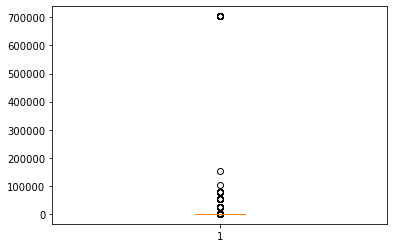

In [6]:
plt.boxplot(data['order_amount'])

After look to the box plot, I think the problem here is the outliner is too different in compare to the rest in data. I will eliminate them to have a better box plot graph.

In [8]:
q3, q1 = np.percentile(data['order_amount'], [75 ,25])
iqr = q3 - q1

In [9]:
data_clean = data[~((data['order_amount'] < (q1-1.5*iqr)) | (data['order_amount'] > (q3+1.5*iqr)))]
data_clean.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


Everything smaller than quartile 1 minus 1.5*Interquartile range (q1 -1.5*iqr) and bigger than quartile 3 plus 1.5* Interquartile range (q3+1.5*iqr) are considered outliers.

In [10]:
data_clean['order_amount'].describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

After elimination, we have 4859 rows left (141 rows was eliminated). Around 3% was eliminated and I think it is not a big deal.

{'whiskers': [<matplotlib.lines.Line2D at 0x27f62e2e430>,
 'caps': [<matplotlib.lines.Line2D at 0x27f62e2eaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f62e2e0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x27f62e481f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f62e48550>],
 'means': []}

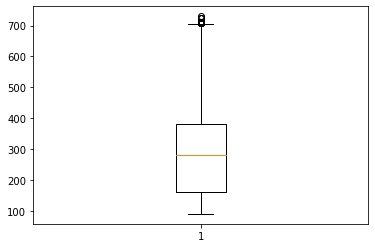

In [11]:
plt.boxplot(data_clean['order_amount'])

After eliminate outliers, the stats and graph look better and I think the AOV now is 293.7 would be make more sense than before. 

In [13]:
data["unit_price"]= data['order_amount']/data['total_items']
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


I add a column unit price to extract the price of single unit in every transaction.

In [14]:
data["unit_price"].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: unit_price, dtype: float64

We have min, max as well as mean of the unit price. We also see there are some outliers in unit price too when the max is a lot higher than 75% of the data set

In [15]:
data["total_items"].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

Look at the total items, we also found that there are some outliers. We can see that there are some order come with high price of single unit and there are some order come with high number of items. That lead to the high of order amount.

In [16]:
df = pd.DataFrame(data)
pivot = df.pivot_table(index=['payment_method'], values=['order_id'], aggfunc='count')
print(pivot)

                order_id
payment_method          
cash                1594
credit_card         1735
debit               1671


We can see the number of transaction was order by cash, credit_card, or debit card.

In [ ]:
SELECT COUNT (*)
FROM Orders
JOIN Shippers
ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = "Speedy Express"

54

In [ ]:
SELECT LastName 
FROM Employees
WHERE EmployeeID=(
SELECT EmployeeID
FROM Orders GROUP BY EmployeeID
HAVING COUNT(EmployeeID) = (
SELECT MAX(EmpID)
FROM(
SELECT (EmployeeID),COUNT (EmployeeID) EmpID
FROM Orders
GROUP BY EmployeeID
)))

Peacock

In [ ]:
SELECT ProductName
FROM Products
WHERE ProductID =(
SELECT ProductID 
FROM(
SELECT ProductID, MAX(quantity) 
FROM(
SELECT ProductID ,SUM(Quantity) quantity
FROM OrderDetails
WHERE OrderID IN(
SELECT OrderID
FROM Orders
WHERE CustomerID IN(
SELECT CustomerID 
FROM Customers
WHERE Country = 'Germany'))
GROUP BY ProductID)))

Boston Crab Meat